# Parcial 3: 
### Curso: Metodos computacionales 
### Profesor: Hernán David Salinas Jiménez


La entrega del examen se debe realizar a traves del git-hub en el directorio de cada estudiante.


# Ecuaciones diferenciales


## Body Planet Orbits
1. (33%) Newton’s explanation of the motion of the planets in terms of a universal law of gravitation is one of the great achievements of science. He was able to prove that the planets traveled along elliptical paths with the sun at one vertex and to predict periods of the motion accurately. All Newton needed to postulate was that the force between a planet of mass $m$ and the sun of mass $M$ is

\begin{equation}
F^{(g)} = -\frac{GmM}{r^2}
\end{equation}

Here $r$ is the planet-CM distance, $G$ is the universal gravitational constant, and the attractive force lies along the line connecting the planet and the sun. The hard part for Newton was solving the resulting differential equations because he had to invent calculus to do it and then had go through numerous analytic manipulations. The numerical solution is straightforward since even for planets the equation of motion is still

\begin{equation}
\vec{f}=m\vec{a} = m \frac{\mathrm{d}^2\vec{r}}{\mathrm{d}t^2}
\end{equation}

with the force having components:

\begin{equation}
f_x  = F^{(g)}\cos \theta =  F^{(g)}\frac{x}{r}
\end{equation}


\begin{equation}
f_y  = F^{(g)}\sin \theta =  F^{(g)}\frac{y}{r}
\end{equation}

where 

\begin{equation}
r=\sqrt{x^2+y^2}
\end{equation}



The equation of motion yields two simultaneous second-order ODEs:

\begin{equation}
\frac{\mathrm{d}^2x}{\mathrm{d}t^2}=-GM \frac{x}{r^3}
\end{equation}

\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2}=-GM \frac{y}{r^3}
\end{equation}


a. Solve the diferential equation with the next parameter:

Assume units such that GM = 1 and use the initial conditions x(0) = 0.5, y(0) = 0, vx(0) = 0.0, vy(0) = 1.63.

b. Realice a graph kind subplot with 1 row and 2 columns: in the first subplot include the graph: x vs t, y vs t and the second graph y vs x,  what is the conclusion of this results?.



In [204]:
#@title Librerías
import numpy as np
import scipy as sp
from scipy import optimize
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.misc import derivative
from scipy.integrate import simpson
import sympy as sp

## Punto a.

In [206]:

#Vamos a resolver las ecuaciones mediante odeint.
#Para esto debemos desacoplar las ecuaciones para obtener edos de grado 1.
#Definamos la función
def orbitaPlaneta(condI,t):
  '''
   Los parámetros ingresados son: condI que será un array con 
   los valores x0,y0,v0x,v0y. t el tiempo en el que se va a resolver 
   la edo y x,y la posición.

  '''
  
  #Condiciones Iniciales 
  x,vx,y,vy = condI
  G = 1
  M = 1
  r = np.sqrt(x**2 + y**2)
  #Procedemos a desacoplar la edo.

  #Primera ecuación
  dxdt = vx

  #Segunda Ecuación
  dvxdt = -G*M*(x/r**3)

  #Tercera Ecuación
  dydt = vy

  #Cuarta Ecuación
  dvydt = -G*M*(y/r**3)
  
  return np.array((dxdt,dvxdt,dydt,dvydt))


In [207]:
#Condiciones Iniciales
x0 = 0.5
y0 = 0
v0x = 0
v0y = 1.63
condI = np.array([x0,v0x,y0,v0y])
#Definamos el tiempo t
t = np.linspace(0,10,1000)

In [208]:
#Resolvamos la edo
edo = odeint(orbitaPlaneta,condI,t)
#Veamos algunos puntos en x
edo[0:10,0]

array([0.5       , 0.49979963, 0.49919882, 0.49819854, 0.49680037,
       0.49500652, 0.4928198 , 0.49024361, 0.48728195, 0.48393936])

##Punto b.

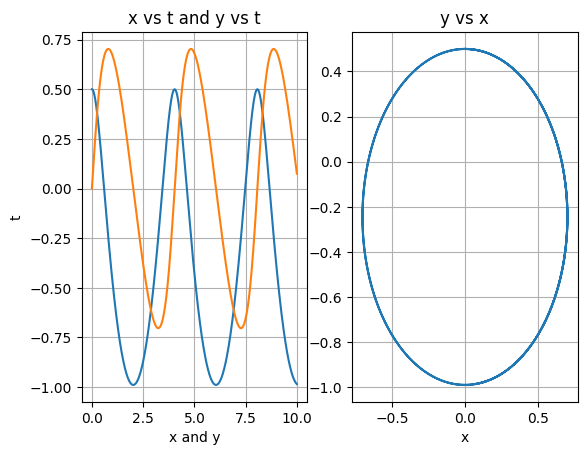

In [209]:
#Veamos las gráficas
fig, axs = plt.subplots(1,2)
axs[0].plot(t,edo[:,0])
axs[0].plot(t,edo[:,2])
axs[1].plot(edo[:,2],edo[:,0])
axs[0].grid()
axs[1].grid()
axs[0].set_title('x vs t and y vs t')
axs[0].set_xlabel('x and y')
axs[0].set_ylabel('t')
axs[1].set_title('y vs x')
axs[1].set_xlabel('x')
plt.show()

En la gráfica de la derecha podemos observar que efectivamente la órbita de los planetas es una elipse.
Para la gráfica de la izquierda la oscilación nos indica la periocidad de la órbita, es decir, cada cierto tiempo t el planeta vuelve a pasar por el mismo punto en x,y y de esta manera es que completa su periodo alrededor del Sol.


# Integracion 
2. (33%) Las [integrales elipticas](https://es.wikipedia.org/wiki/Integral_el%C3%ADptica#:~:text=Una%20integral%20el%C3%ADptica%20de%20primera,segundas%20dependen%20de%20dos%20variables) son integrales que permite dar solución a múltiples problemas en física y matemáticas. Algunos ejemplos de su uso, pueden ser encontrados en las siguientes referencias [[1]](http://www.sc.ehu.es/sbweb/fisica3/especial/eliptica/eliptica.html)
[[2]](http://www.sc.ehu.es/sbweb/fisica_/numerico/integral/eliptica_ejemplos.html). El siguiente problema esta relacionado con al integración eliptica.


La [longitud de arco](http://www.sc.ehu.es/sbweb/fisica3/especial/eliptica/eliptica.html) de  una elipse puede ser calculada a través de la siguiente integral.

\begin{equation}
L(k) = 4a\int_0^{\pi/2}  \mathrm{d} \phi \sqrt{1-k^2\sin^2 \phi}
\end{equation}

donde $ k^2 = \frac{a^2-b^2}{a^2} = \epsilon $, siendo $\epsilon$ la excentricidad de la elipse, a y b el semieje mayor y menor de la elipse respectivamente, $a>b$.

1. Para $b = 1$, y $a$ entre 1 y 100, construya un conjunto de valores de excentrecidades y realice la integración para cada excentrecidad.
Construya un grafico de $L$ vs $\epsilon$.

2. Determine la longitud de arco de la solucion del problema 1.



##Punto 1.

In [210]:
#Definamos el conjunto de valores para k
a = np.linspace(1,100,100)
b = 1
k = np.sqrt((a**2-b**2)/a**2)

#Definimos el dominio en el que se va a integrar.
dominio = np.linspace(0,(np.pi)/2,100)

#Definamos la función 
funcionE = lambda x,a,dom: (4*a)*(np.sqrt(1 - (k**2)*(np.sin(dom)**2)))

soluciones = np.zeros(100)

#Realizamos la integral para cada valor de e.
for i in range(100):
  soluciones[i] = simpson(funcionE(dominio,a[i],k[i]),dominio, dx=0.001)

Text(0.5, 1.0, 'L vs $\\epsilon$')

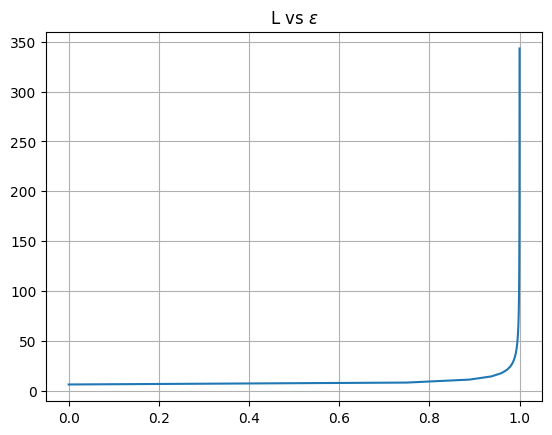

In [211]:
#Graficamos
plt.plot(k**2,soluciones)
plt.grid()
plt.title('L vs $\epsilon$')

##Punto 2.

In [212]:
#Definamos el semieje mayor y menor
xmin = abs(np.min(edo[:,2]))
xmax = abs(np.max(edo[:,2]))
a = (xmax-xmin)/2
ymin = abs(np.min(edo[:,0]))
ymax = abs(np.max(edo[:,0]))
b = (ymax-ymin)/2
k = (a**2 -b**2)/a**2

In [ ]:
funcion = lambda x,a,k: (4*a)*(np.sqrt(1 - (k**2)*(np.sin(x)**2)))
dom = np.linspace(0,2*np.pi,100)
y = funcion(dom,a,k)
integral = simpson(y,dom,dx=0.001)
integral


# Matrices: Rotación  en el plano, autovalores y autovectores
3 (33%).   Considere la siguiente matrix de rotación:
\begin{bmatrix} 
\cos \theta & -\sin \theta\\ 
\sin \theta & \cos \theta
\end{bmatrix}

a) Encontrar el polinomio característico de A

b) Encontrar los autovalores y autovectores

c) construya la matriz diagonal con los autovalores y autovectores y compruebe su solución. 

Encontrar los autovalores y autovectores para $\theta=45$.

In [ ]:
x = 45
A = np.array(([np.cos(x),(-1)*np.sin(x)],[np.sin(x),np.cos(x)]))
A

array([[ 0.52532199, -0.85090352],
       [ 0.85090352,  0.52532199]])

In [ ]:
#Hallemos el polinimo característico.
#Saquemos los coeficientes
coeficientes = np.poly(A)
#Creamos el polinomio.
polinimo = np.poly1d(coeficientes)
print(polinimo)

   2
1 x - 1.051 x + 1


In [ ]:
#Ahora veamos los autovalores y autovectores.
auto = np.linalg.eig(A)
print(f'los autovalores de la matriz son: {auto[0]}')

los autovalores de la matriz son: [0.52532199+0.85090352j 0.52532199-0.85090352j]


In [ ]:
print(f'los autovectores de la matriz son: {auto[1]}')

los autovectores de la matriz son: [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


In [ ]:
#Diagonal
P = auto[1]
Pinv = np.linalg.inv(P)
diagonal = Pinv@A@P
diagonal

array([[0.52532199+0.85090352j, 0.        +0.j        ],
       [0.        +0.j        , 0.52532199-0.85090352j]])